In [39]:
import os
import cv2
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle

In [46]:
DATASET_DIR = 'F:/AFALL21-22/CVPR/final assignment'
TRAIN_DATASET = os.path.join(DATASET_DIR,'Train')#defining train directory seperately
TEST_DATASET = os.path.join (DATASET_DIR,'Test')#defining test directory seperately
print (DATASET_DIR)
print (TRAIN_DATASET)
print (TEST_DATASET)

F:/AFALL21-22/CVPR/final assignment
F:/AFALL21-22/CVPR/final assignment/Train
F:/AFALL21-22/CVPR/final assignment/Test


In [47]:
CATEGORIES = []
for c in os.listdir(TRAIN_DATASET):#list directory gives the access to all files in the path
    CATEGORIES.append(c)
print (CATEGORIES)

FileNotFoundError: ignored

In [43]:
plt.figure(figsize=(20,5))
tmp = 0
for c in CATEGORIES:#loop to access in folder categories
    path = os.path.join(TRAIN_DATASET,c)#here c has 2 components, with and without masks
    for img in os.listdir(path):#loop to access all the images in with mask at first
        img_arr = cv2.imread (os.path.join(path, img))
        plt.subplot(2,10, tmp+1)
        plt.imshow(img_arr)
        plt.xticks([])
        plt.yticks([])
        if tmp % 10 == 0:
            plt.ylabel (c, fontsize=20, color='black')
        tmp = tmp+1
        if tmp % 10 == 0:
            break;
plt.tight_layout()
plt.show()

<Figure size 1440x360 with 0 Axes>

In [48]:
IMG_SIZE = 227
train_data=[]
for c in CATEGORIES:
    path = os.path.join (TRAIN_DATASET,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir (path)):
        try:
            img_arr = cv2.imread(os.path.join(path,img))
            img_resized = cv2.resize (img_arr,(IMG_SIZE, IMG_SIZE))
            train_data.append ([img_resized, class_num])
        except Exception as e:
            pass

print (len(train_data))

0


In [49]:
test_data=[]
for c in CATEGORIES:
    path = os.path.join (TEST_DATASET,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir (path)):
        try:
            img_arr = cv2.imread(os.path.join(path,img))
            img_resized = cv2.resize (img_arr,(IMG_SIZE, IMG_SIZE))
            test_data.append ([img_resized, class_num])
        except Exception as e:
            pass

print (len(test_data))

0


In [50]:
random.shuffle (train_data)
random.shuffle (test_data)

In [51]:
X_train = []
Y_train = []
for img,label in train_data:
    X_train.append (img)
    Y_train.append (label)

X_train = np.array(X_train).astype('float32').reshape (-1,227,227,3)
Y_train = np.array (Y_train)

print (X_train.shape, Y_train.shape)
plt.figure()
plt.imshow(X_train[2000].astype('uint8'))
plt.ylabel(Y_train[2000])
plt.show()

(0, 227, 227, 3) (0,)


IndexError: ignored

<Figure size 432x288 with 0 Axes>

In [52]:

X_test = []
Y_test = []
for img,label in test_data:
    X_test.append (img)
    Y_test.append (label)

X_test = np.array(X_test).astype('float32').reshape (-1,227,227,3)
Y_test = np.array (Y_test)

print (X_test.shape, Y_test.shape)

(0, 227, 227, 3) (0,)


In [53]:

p = open ('./X_train_CDD.pickle','wb')
pickle.dump(X_train, p)
p.close()

p = open ('./Y_train_CDD.pickle','wb')
pickle.dump(Y_train, p)
p.close()

p = open ('./X_test_CDD.pickle','wb')
pickle.dump(X_test, p)
p.close()

p = open ('./Y_test_CDD.pickle','wb')
pickle.dump(Y_test, p)
p.close()

In [54]:
pickle_in = open("C:/Users/Ankur Saha Bindu/X_train_CDD.pickle","rb")
X_train = pickle.load (pickle_in)

pickle_in = open("C:/Users/Ankur Saha Bindu/Y_train_CDD.pickle","rb")
Y_train = pickle.load (pickle_in)

pickle_in = open("C:/Users/Ankur Saha Bindu/X_test_CDD.pickle","rb")
X_test = pickle.load (pickle_in)

pickle_in = open("C:/Users/Ankur Saha Bindu/Y_test_CDD.pickle","rb")
Y_test = pickle.load (pickle_in)

print (X_train.shape)

FileNotFoundError: ignored

In [55]:

mean_rgb = np.mean(X_train, axis=(0,1,2))
print(mean_rgb)

[nan nan nan]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [56]:

X_train_norm = np.empty_like(X_train)
X_test_norm = np.empty_like(X_test)

In [57]:
for i in range(len(X_train)):
    for c in range(3):
        if(c==1):
            X_train_norm[i,:, :, c] = X_train[i,:, :, c] - mean_rgb[0]
        elif(c==2):
            X_train_norm[i,:, :, c] = X_train[i,:, :, c] - mean_rgb[1]
        else:
            X_train_norm[i,:, :, c] = X_train[i,:, :, c] - mean_rgb[2]
            
for i in range(len(X_test)):
    for c in range(3):
        if(c==1):
            X_test_norm[i,:, :, c] = X_test[i,:, :, c] - mean_rgb[0]
        elif(c==2):
            X_test_norm[i,:, :, c] = X_test[i,:, :, c] - mean_rgb[1]
        else:
            X_test_norm[i,:, :, c] = X_test[i,:, :, c] - mean_rgb[2]

IndexError: ignored

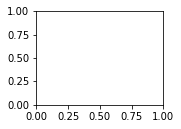

In [58]:
c = 0
plt.figure(figsize=(5,10))
for i in range(5):
    plt.subplot(5,2,c+1)
    plt.imshow(X_train[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(5,2,c+2)
    plt.imshow(X_train_norm[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])

    c += 2
    
plt.tight_layout()
plt.show()

In [59]:
model = tf.keras.Sequential([
    ## input layer
    tf.keras.Input(shape=X_train_norm.shape[1:]),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=4096),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(units=4096),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(10),
    tf.keras.layers.Activation('softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 227, 227, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 227, 227, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 227, 227, 64)      36928     
_________________________________________________________________
activation_1 (Activation)    (None, 227, 227, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 113, 113, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 113, 113, 128)     73856     
_________________________________________________________________
activation_2 (Activation)    (None, 113, 113, 128)     0